# Laborator 5 - Moroianu Theodor

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercitiu 1

$f_s = 44.100 Hz$

Daca avem $N$ esantioane, frecventa fundamentala este 
$
f = \frac{f_s}{N}
$

Asadar, dorim ca $f = 1$. Asadar, $N = 44.100$.

# Exercitiul 1


## Exercitiu 2

In [3]:
# Definesc tipurile de fereastra.

def dreptunghiular(N):
    return np.ones((N,))

def hanning(N):
    points = np.array([2 * np.pi * n / N for n in range(N)])
    return 0.5 * (1 - np.cos(points))
    
def hamming(N):
    points = np.array([2 * np.pi * n / N for n in range(N)])
    return 0.54 - 0.46 * np.cos(points)

def blackman(N):
    points = np.array([2 * np.pi * n / N for n in range(N)])
    return 0.42 - 0.5 * np.cos(points) + 0.08 * np.cos(2 * points)

def flat_top(N):
    points = np.array([2 * np.pi * n / N for n in range(N)])
    return (0.22 -
        0.42 * np.cos(points) +
        0.28 * np.cos(2 * points) -
        0.08 * np.cos(2 * points) +
        0.007 * np.cos(4 * points))

def sine(frequency, time):
    return np.sin(2 * np.pi * frequency * time)


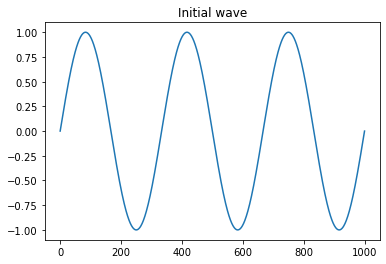

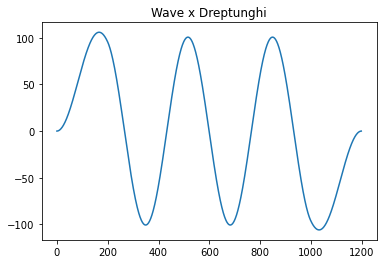

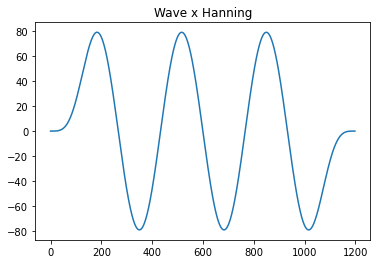

In [27]:
# A
wave = sine(100, np.linspace(0, 0.03, 1000))
plt.plot(wave)
plt.title("Initial wave")
plt.show()

wave_square = np.convolve(wave, dreptunghiular(200))
plt.plot(wave_square)
plt.title("Wave x Dreptunghi")
plt.show()

wave_hanning = np.convolve(wave, hanning(200))
plt.plot(wave_hanning)
plt.title("Wave x Hanning")
plt.show()

Waves


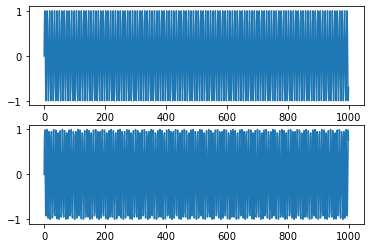

Pure FFT


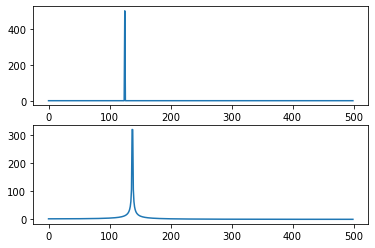

FFT Dreptunghi


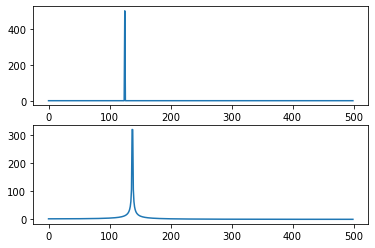

FFT flat


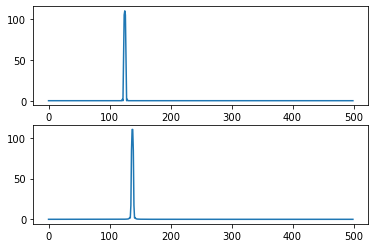

In [38]:
# B
time_of_view = 999 / 8000
wave_1 = sine(1000, np.linspace(0, time_of_view, int(8000 * time_of_view + 1)))
wave_2 = sine(1100, np.linspace(0, time_of_view, int(8000 * time_of_view + 1)))

rect_window = dreptunghiular(1000)
flat_top_window = flat_top(1000)

wave_1_filtered_drept = wave_1 * rect_window
wave_2_filtered_drept = wave_2 * rect_window

wave_1_filtered_flat = wave_1 * flat_top_window
wave_2_filtered_flat = wave_2 * flat_top_window

def compute_fft(wave):
    fft = np.fft.fft(wave)
    fft = np.abs(fft)
    fft = fft[: len(fft) // 2]
    return fft

wave_1_fft = compute_fft(wave_1)
wave_1_fft_drept = compute_fft(wave_1_filtered_drept)
wave_1_fft_flat = compute_fft(wave_1_filtered_flat)

wave_2_fft = compute_fft(wave_2)
wave_2_fft_drept = compute_fft(wave_2_filtered_drept)
wave_2_fft_flat = compute_fft(wave_2_filtered_flat)

print("Waves", flush=True)
fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].plot(wave_1)
ax[1].plot(wave_2)
plt.show()

print("Pure FFT", flush=True)
fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].plot(wave_1_fft)
ax[1].plot(wave_2_fft)
plt.show()

print("FFT Dreptunghi")
fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].plot(wave_1_fft_drept)
ax[1].plot(wave_2_fft_drept)
plt.show()

print("FFT flat")
fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].plot(wave_1_fft_flat)
ax[1].plot(wave_2_fft_flat)
plt.show()



Vedem cu usurinta ca aplicarea unei ferestre de tip flat-top pe cea de-a doua sinusoida ajuta mult la evitarea leakage-ului.

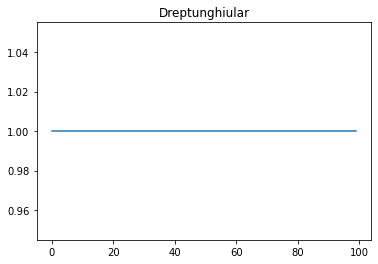

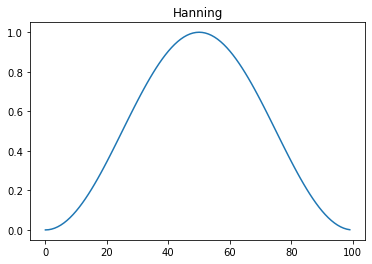

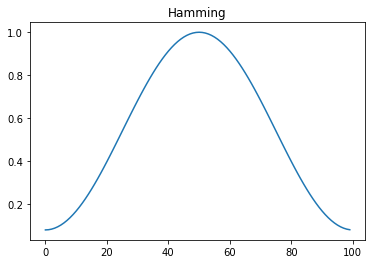

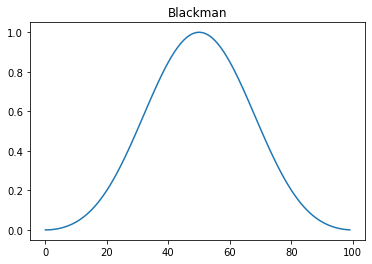

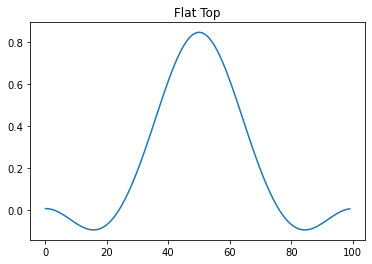

In [29]:
# C

plt.title("Dreptunghiular")
plt.plot(dreptunghiular(100))
plt.show()

plt.title("Hanning")
plt.plot(hanning(100))
plt.show()

plt.title("Hamming")
plt.plot(hamming(100))
plt.show()

plt.title("Blackman")
plt.plot(blackman(100))
plt.show()

plt.title("Flat Top")
plt.plot(flat_top(100))
plt.show()

## Exercitiu 3

Am rezolvat deja exercitiul 3 in laboratorul 2